In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [ ]:
## Encoding
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [ ]:
## independent and dependent features
x = df.drop('FWI',axis =1)
y = df['FWI']


In [ ]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [ ]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [ ]:
## train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x_train.shape , x_test.shape

((182, 11), (61, 11))

In [ ]:
 ## Feature Selection Based on correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


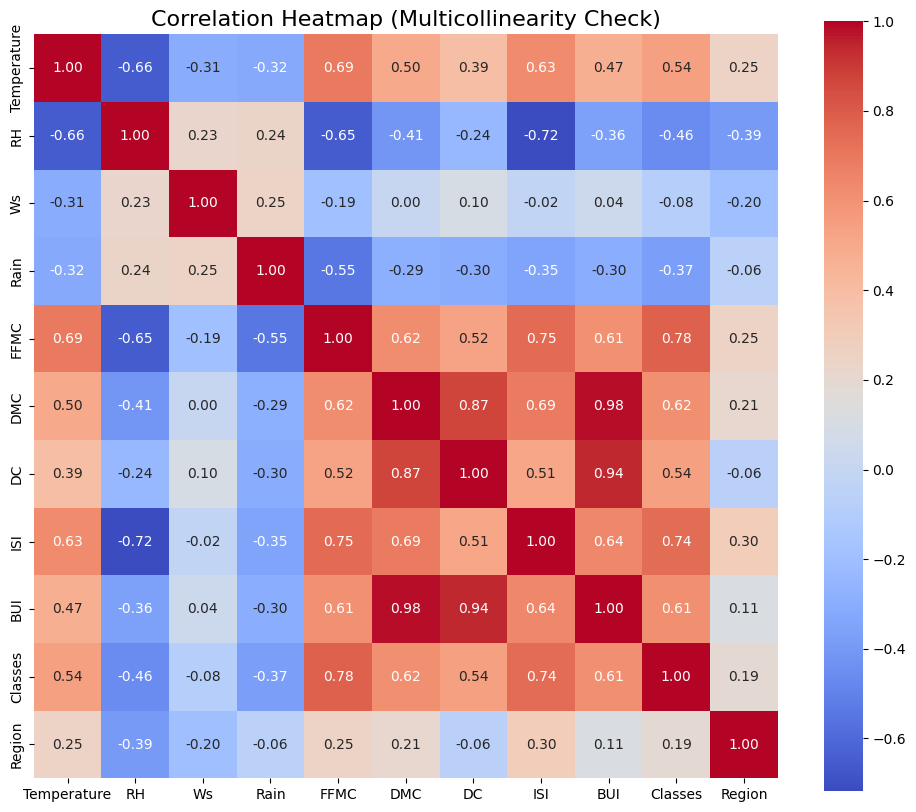

In [ ]:
plt.figure(figsize=(12,10))
corr = x_train.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap (Multicollinearity Check)", fontsize=16)
plt.show()


In [ ]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
## threshold -- Domain expertise
corr_features = correlation(x_train,0.85)

In [ ]:
## drop feature when correlation is more than 0.85
x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)

x_train.shape,x_test.shape


((182, 9), (61, 9))

# Feature Scaling or  Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

# **Box Plots To Understand Effect of Standard Scaler**

Text(0.5, 1.0, 'x_train after scaling')

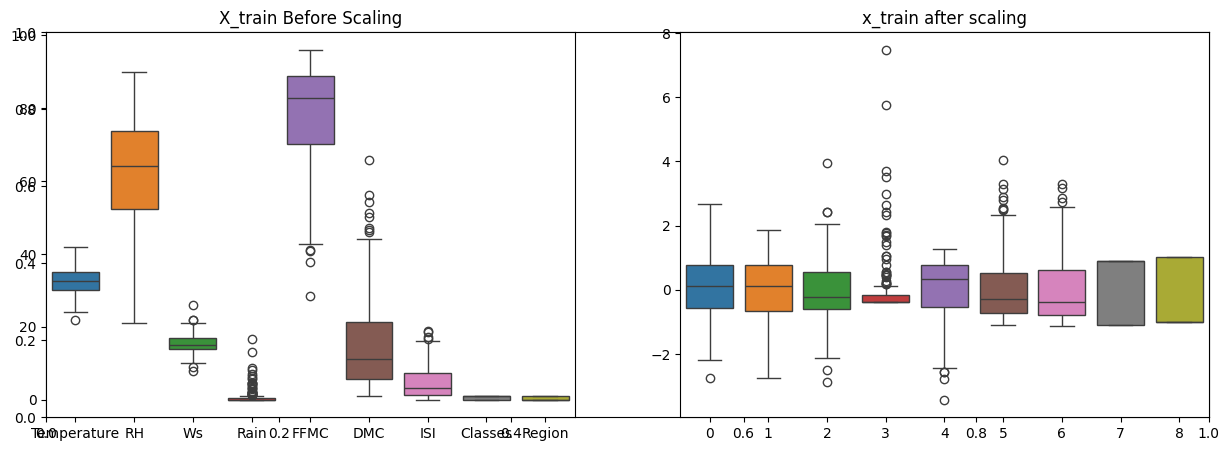

In [ ]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)
plt.title('x_train after scaling')

## **Linear Regression Model**

Mean Absolute error:-  0.5468236465249986
R2 Score Error:-  0.9847657384266951


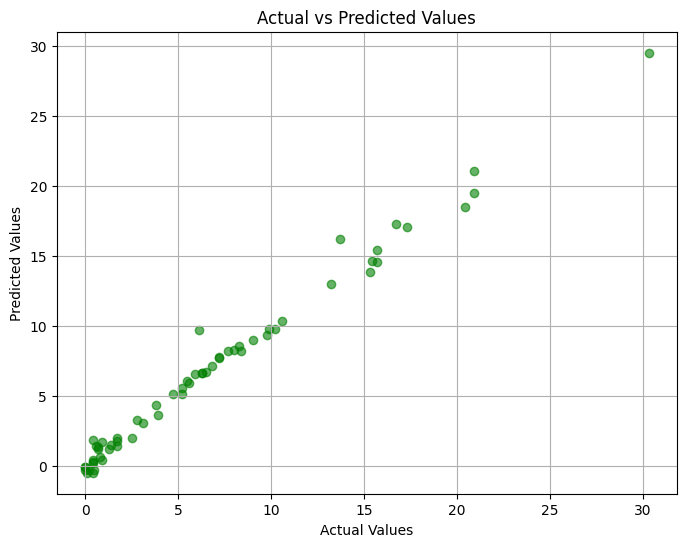

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred = linreg.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error:- ",mae)
print("R2 Score Error:- ",score)
# Scatter plot of actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='g', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

# **Lasso Regression**

Mean Absolute error:-  1.133175994914409
R2 Score Error:-  0.9492020263112388


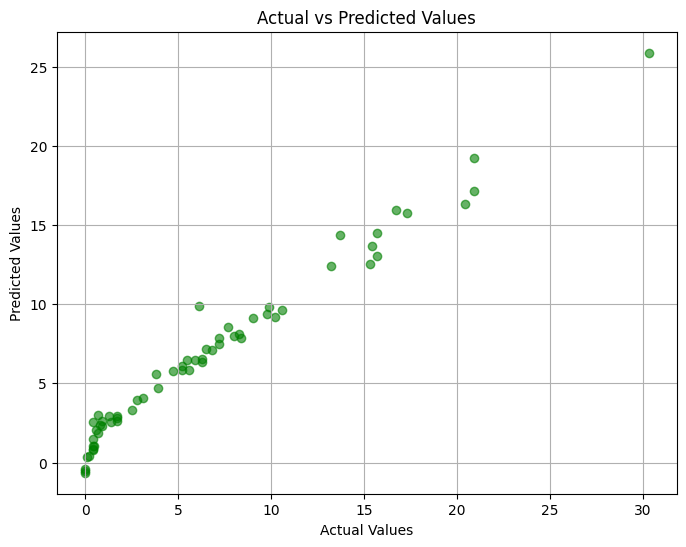

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error:- ",mae)
print("R2 Score Error:- ",score)
# Scatter plot of actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='g', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

**Cross** **Validation** **Lasso**

In [ ]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [ ]:
lassocv.alpha_

np.float64(0.05725391318234408)

Mean Absolute error:-  0.619970115826343
R2 Score Error:-  0.9820946715928275


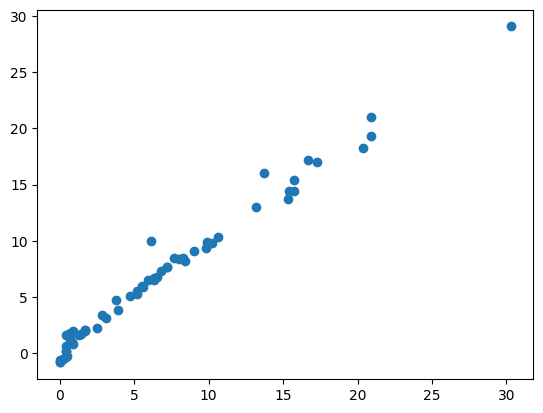

In [ ]:
y_pred = lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error:- ",mae)
print("R2 Score Error:- ",score)

# **Ridge Regression Model**

Mean Absolute error:-  0.5642305340105692
R2 Score Error:-  0.9842993364555513


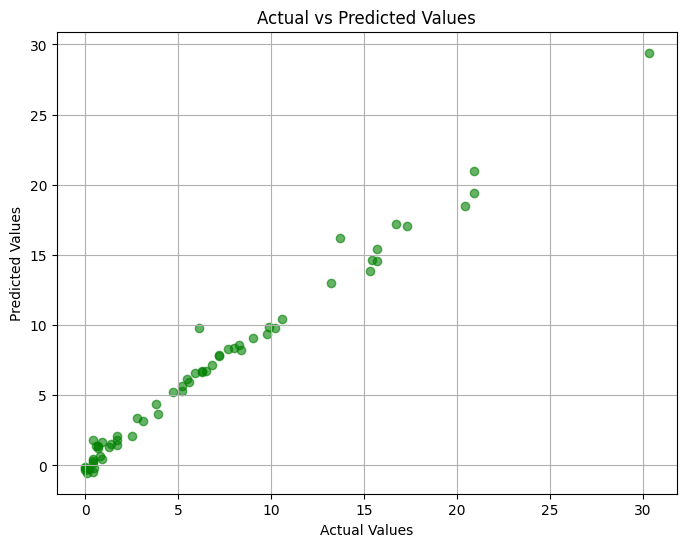

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error:- ",mae)
print("R2 Score Error:- ",score)
# Scatter plot of actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='g', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

# **Cross Validation Of Ridge CV**

Mean Absolute error:-  0.5642305340105692
R2 Score Error:-  0.9842993364555513


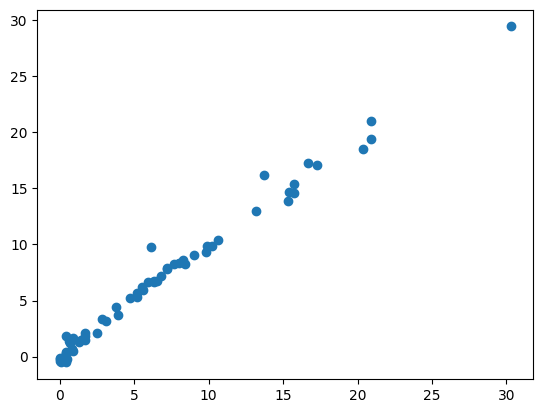

In [ ]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(x_train_scaled,y_train)
y_pred = ridgecv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error:- ",mae)
print("R2 Score Error:- ",score)
plt.scatter(y_test,y_pred)

In [ ]:
ridgecv.alpha_

np.float64(1.0)

# Elasticnet **Regression**

Mean Absolute error:-  1.8822353634896005
R2 Score Error:-  0.8753460589519703


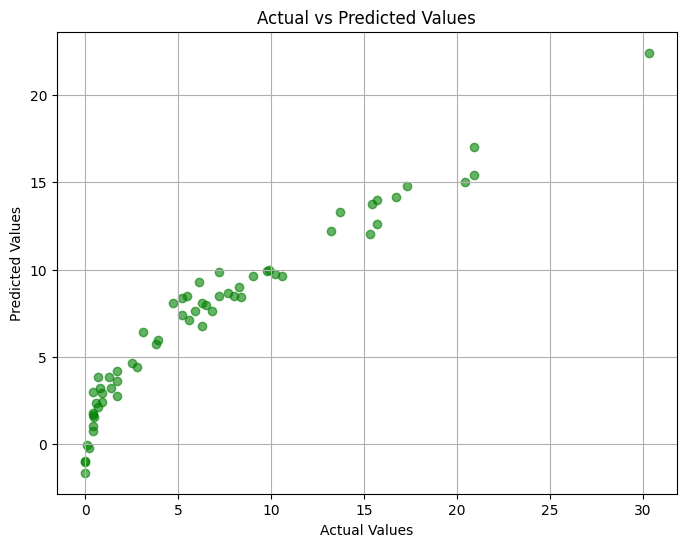

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred = elastic.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error:- ",mae)
print("R2 Score Error:- ",score)
# Scatter plot of actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='g', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

# **Cross** **Validation** **Of** **ElasticNet**

Mean Absolute error:-  0.6575946731430898
R2 Score Error:-  0.9814217587854941


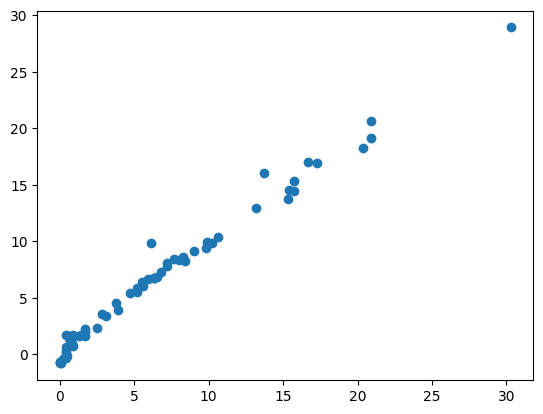

In [ ]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv = 5)
elasticcv.fit(x_train_scaled,y_train)
y_pred = elasticcv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error:- ",mae)
print("R2 Score Error:- ",score)
plt.scatter(y_test,y_pred)

In [ ]:
elasticcv.alpha_

np.float64(0.04311146156383891)

In [ ]:
## Pickle the machine learning models, preprocessing model StandardScaler
scaler

StandardScaler()

In [ ]:
ridge

Ridge()

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))